In [1]:
import numpy as np
from matplotlib import pyplot as plt
import glob

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

plt.style.use('seaborn')

nice_fonts = {
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 16,
        "font.size": 16,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 14,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
}

matplotlib.rcParams.update(nice_fonts)

In [3]:
import seaborn as sns
sns.set_context(rc=nice_fonts)   

In [4]:
# Load some data
    
obs_bc = []
gt_bc = []
gt_sink = []
gt_tcn = []
obs_bc_hung = []
obs_sink = []
obs_tcn_hung = []
obs_tcn = []
for seed in range(1,21):
    try:
        gt_bc.append(np.genfromtxt('gt_actions_bc_%02d.txt'%seed))
        obs_bc.append(np.genfromtxt('actions_bc_%02d.txt'%seed))
        obs_bc_hung.append(np.genfromtxt('actions_bc_hung_%02d.txt'%seed))
        gt_sink.append(np.genfromtxt('gt_actions_sink_%02d.txt'%seed))
        obs_sink.append(np.genfromtxt('actions_sink_%02d.txt'%seed))
        gt_tcn.append(np.genfromtxt('gt_actions_tcn_%02d.txt'%seed))
        obs_tcn_hung.append(np.genfromtxt('actions_tcn_hung_%02d.txt'%seed))
        obs_tcn.append(np.genfromtxt('actions_tcn_%02d.txt'%seed))
    except:
        continue;

In [5]:
def check_block_color(x,y):
    x[x==1]=0
    x[x==3]=2
    x[x==5]=4
    y[y==1]=0
    y[y==3]=2
    y[y==5]=4
    return x==y

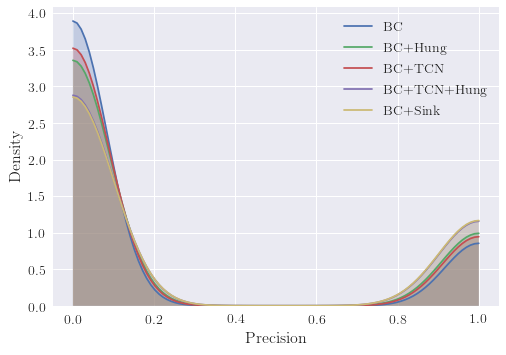

BC 0.18
BC+Hung 0.23
BC+TCN 0.21
BC+TCN+Hung 0.29
BC+Sink 0.29


In [32]:
# Check perfect order - not great, because multiple ways to build a tower
pre_bc = [np.array_equal(x,y) for x,y in zip(np.vstack(gt_bc),np.vstack(obs_bc))]
pre_bc_hung = [np.array_equal(x,y) for x,y in zip(np.vstack(gt_bc),np.vstack(obs_bc_hung))]

pre_tcn = [np.array_equal(x,y) for x,y in zip(np.vstack(gt_tcn),np.vstack(obs_tcn))]
pre_tcn_hung = [np.array_equal(x,y) for x,y in zip(np.vstack(gt_tcn),np.vstack(obs_tcn_hung))]

pre_sink = [np.array_equal(x,y) for x,y in zip(np.vstack(gt_sink),np.vstack(obs_sink))]

sns.kdeplot(pre_bc,gridsize=(100),shade=True,label='BC',clip=(0,1))
sns.kdeplot(pre_bc_hung,gridsize=(100),shade=True,label='BC+Hung',clip=(0,1))
sns.kdeplot(pre_tcn,gridsize=(100),shade=True,label='BC+TCN',clip=(0,1))
sns.kdeplot(pre_tcn_hung,gridsize=(100),shade=True,label='BC+TCN+Hung',clip=(0,1))
sns.kdeplot(pre_sink,gridsize=(100),shade=True,label='BC+Sink',clip=(0,1))
plt.legend()
plt.xlabel('Precision')
plt.ylabel('Density')
plt.show()

print('BC %2.2f'%np.mean(pre_bc))
print('BC+Hung %2.2f'%np.mean(pre_bc_hung))
print('BC+TCN %2.2f'%np.mean(pre_tcn))
print('BC+TCN+Hung %2.2f'%np.mean(pre_tcn_hung))
print('BC+Sink %2.2f'%np.mean(pre_sink))

In [41]:
def check_reps(obs_in):
    bc_counts = []
    for obs in np.vstack(obs_in):
        _,count = np.unique(obs,return_index=False,return_inverse=False,return_counts=True)
        bc_counts.append(np.sum(count>1))
    return np.sum(bc_counts)/np.vstack(obs_in).shape[0]

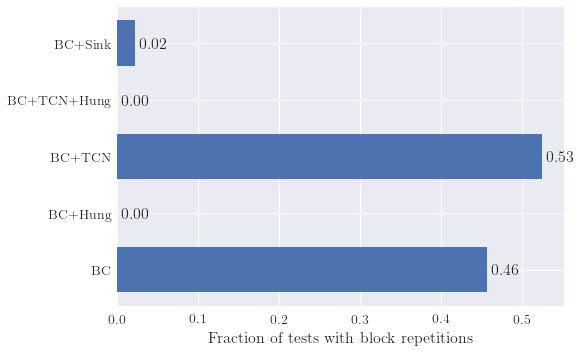

In [60]:
# Block re-use is bad because you can't pick up a block you've already build with (tower collapse)

counts_bc = check_reps(obs_bc)
counts_bc_hung = check_reps(obs_bc_hung)
counts_tcn = check_reps(obs_tcn)
counts_tcn_hung = check_reps(obs_tcn_hung)
counts_sink = check_reps(obs_sink)

plt.barh(np.arange(5),[counts_bc,counts_bc_hung,counts_tcn,counts_tcn_hung,counts_sink])

for i, v in enumerate([counts_bc,counts_bc_hung,counts_tcn,counts_tcn_hung,counts_sink]):
    plt.text(v + 0.005, i-0.1, "%2.2f"%v, fontweight='bold')
plt.xlabel('Fraction of tests with block repetitions')
plt.yticks(np.arange(5),['BC','BC+Hung','BC+TCN','BC+TCN+Hung','BC+Sink'])
plt.show()


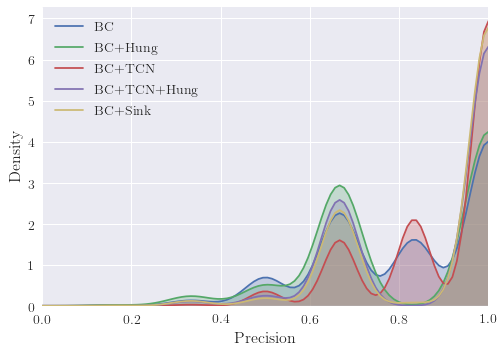

BC 0.83
BC+Hung 0.82
BC+TCN 0.90
BC+TCN+Hung 0.89
BC+Sink 0.90


In [33]:
pre_bc = np.sum([check_block_color(x,y) for x,y in zip(np.vstack(gt_bc),np.vstack(obs_bc))],axis=1)/6
pre_bc_hung = np.sum([check_block_color(x,y) for x,y in zip(np.vstack(gt_bc),np.vstack(obs_bc_hung))],axis=1)/6

pre_tcn = np.sum([check_block_color(x,y) for x,y in zip(np.vstack(gt_tcn),np.vstack(obs_tcn))],axis=1)/6
pre_tcn_hung = np.sum([check_block_color(x,y) for x,y in zip(np.vstack(gt_tcn),np.vstack(obs_tcn_hung))],axis=1)/6

pre_sink = np.sum([check_block_color(x,y) for x,y in zip(np.vstack(gt_sink),np.vstack(obs_sink))],axis=1)/6

sns.kdeplot(pre_bc,gridsize=(100),shade=True,clip=(0,1),label='BC',bw=0.25)
sns.kdeplot(pre_bc_hung,gridsize=(100),shade=True,clip=(0,1),label='BC+Hung',bw=0.25)
sns.kdeplot(pre_tcn,gridsize=(100),shade=True,clip=(0,1),label='BC+TCN',bw=0.25)
sns.kdeplot(pre_tcn_hung,gridsize=(100),shade=True,clip=(0,1),label='BC+TCN+Hung',bw=0.25)
sns.kdeplot(pre_sink,gridsize=(100),shade=True,clip=(0,1),label='BC+Sink',bw=0.25)
plt.xlim(0,1)
plt.legend()
plt.xlabel('Precision')
plt.ylabel('Density')
plt.show()

print('BC %2.2f'%np.mean(pre_bc))
print('BC+Hung %2.2f'%np.mean(pre_bc_hung))
print('BC+TCN %2.2f'%np.mean(pre_tcn))
print('BC+TCN+Hung %2.2f'%np.mean(pre_tcn_hung))
print('BC+Sink %2.2f'%np.mean(pre_sink))

In [9]:
# Check Kendall's tower for better idea of performance
tau_bc = []
tau_bc_hung = []
tau_sink = []
tau_tcn_hung = []
tau_tcn = []
for seed in range(1,21):
    try:
        tau_bc.append(np.genfromtxt('tau_bc_%02d.txt'%seed))
        tau_bc_hung.append(np.genfromtxt('tau_bc_hung%02d.txt'%seed))
        tau_sink.append(np.genfromtxt('tau_sink_%02d.txt'%seed))
        tau_tcn_hung.append(np.genfromtxt('tau_tcn_hung%02d.txt'%seed))
        tau_tcn.append(np.genfromtxt('tau_tcn_%02d.txt'%seed))
    except:
        continue;

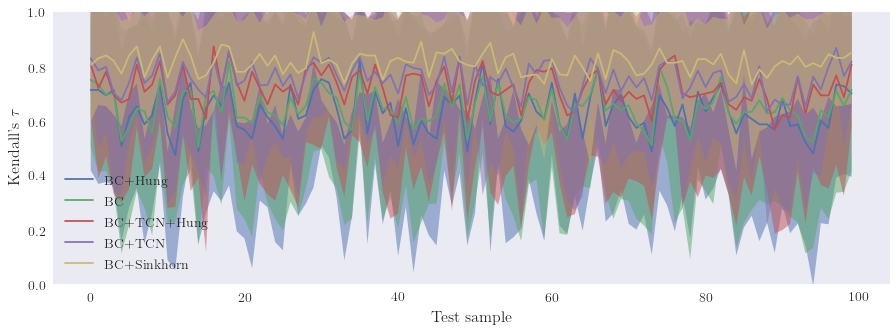

In [10]:
plt.figure(figsize=(15,5))

mu = np.mean(np.array(tau_bc_hung),axis=0)
std = np.std(np.array(tau_bc_hung),axis=0)

plt.plot(mu,label='BC+Hung')
plt.fill_between(np.arange(mu.shape[0]),mu-std,mu+std,alpha=0.5)

mu = np.mean(np.array(tau_bc),axis=0)
std = np.std(np.array(tau_bc),axis=0)

plt.plot(mu,label='BC')
plt.fill_between(np.arange(mu.shape[0]),mu-std,mu+std,alpha=0.5)

mu = np.mean(np.array(tau_tcn_hung),axis=0)
std = np.std(np.array(tau_tcn_hung),axis=0)

plt.plot(mu,label='BC+TCN+Hung')
plt.fill_between(np.arange(mu.shape[0]),mu-std,mu+std,alpha=0.5)

mu = np.mean(np.array(tau_tcn),axis=0)
std = np.std(np.array(tau_tcn),axis=0)

plt.plot(mu,label='BC+TCN')
plt.fill_between(np.arange(mu.shape[0]),mu-std,mu+std,alpha=0.5)

mu = np.mean(np.array(tau_sink),axis=0)
std = np.std(np.array(tau_sink),axis=0)

plt.plot(mu,label='BC+Sinkhorn')
plt.fill_between(np.arange(mu.shape[0]),mu-std,mu+std,alpha=0.5)

plt.grid()
plt.xlabel('Test sample')
plt.ylabel('Kendall\'s $\\tau$')
plt.legend()
plt.ylim(0,1)
plt.show()

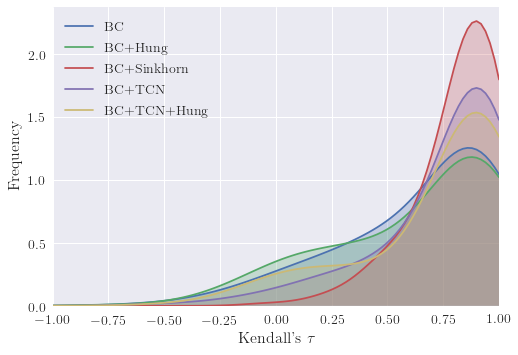

In [11]:
sns.kdeplot(np.concatenate(tau_bc).ravel(),gridsize=(100),shade=True,clip=(-1,1),label='BC',bw=0.5)
sns.kdeplot(np.concatenate(tau_bc_hung).ravel(),gridsize=(100), shade=True,clip=(-1,1),label='BC+Hung',bw=0.5)
sns.kdeplot(np.concatenate(tau_sink).ravel(),gridsize=(100), shade=True,clip=(-1,1),label='BC+Sinkhorn',bw=0.5)
sns.kdeplot(np.concatenate(tau_tcn).ravel(),gridsize=(100), shade=True,clip=(-1,1),label='BC+TCN',bw=0.5)
sns.kdeplot(np.concatenate(tau_tcn_hung).ravel(),gridsize=(100), shade=True,clip=(-1,1),label='BC+TCN+Hung',bw=0.5)
plt.xlabel('Kendall\'s $\\tau$')
plt.ylabel('Frequency')
plt.xlim(-1,1)
plt.savefig('kde_bc.pdf')
plt.show()